# Deep Fashion 2 visualization

The main purpose of this notebook is to understand the contents of the Deep Fashion dataset and have answers to questions like:

- How many images per category are there?
- How many clothing objects per image are there?
- Is the quality of the image good enough?
- What does the attributes tell us about the images?

In [1]:
from typing import List

import skimage.io

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from masks import get_mask
from data_loader import load_training_df
from visualization import display_instances

In [2]:
dataset_path = 'dataset'

## Read dataset

Read images and annotations in training.

In [3]:
df = load_training_df(dataset_path)

Map ordinal categories (e.g. scale, occlusion and viewpoint) into categorical columns for better understanding (values according to documentation).

In [4]:
df['scale_categorical'] = df['scale'].map(
    {1: 'small_scale', 2: 'modest_scale', 3: 'large_scale'}
)
df['zoom_in_categorical'] = df['zoom_in'].map(
    {1: 'no_zoom_in', 2: 'medium_zoom_in', 3: 'large_zoom_in'}
)
df['viewpoint_categorical'] = df['viewpoint'].map(
    {1: 'no_wear', 2: 'frontal_viewpoint', 3: 'side_or_back_viewpoint'}
)
df['occlusion_categorical'] = df['occlusion'].map(
    {1: 'slight_occlusion', 2: 'medium_occlusion', 3: 'heavy_occlusion'}
)

Let's visualize some examples.

In [5]:
df

,segmentation,scale,viewpoint,zoom_in,landmarks,style,bounding_box,category_id,occlusion,category_name,source,pair_id,image_path,scale_categorical,zoom_in_categorical,viewpoint_categorical,occlusion_categorical
id,,,,,,,,,,,,,,,,,
1,"[[460, 438, 374, 484, 251, 520, 269, 586, 298,...",2,2,3,"[251, 520, 1, 374, 484, 1, 460, 438, 1, 269, 5...",0,"[249, 423, 466, 623]",8,2,trousers,user,1,dataset\train\image\000001.jpg,modest_scale,large_zoom_in,frontal_viewpoint,medium_occlusion
1,"[[257, 35, 261, 89, 228, 123, 137, 103, 45, 91...",3,2,2,"[182, 54, 1, 45, 91, 1, 137, 103, 1, 228, 123,...",1,"[0, 29, 466, 622]",1,2,short sleeve top,user,1,dataset\train\image\000001.jpg,large_scale,medium_zoom_in,frontal_viewpoint,medium_occlusion
2,"[[220.25, 187.55, 259.6, 177.6, 296.6, 158.6, ...",3,3,1,"[271, 172, 2, 313, 145, 2, 0, 0, 0, 0, 0, 0, 0...",2,"[165, 133, 466, 572]",1,2,short sleeve top,shop,1,dataset\train\image\000002.jpg,large_scale,no_zoom_in,side_or_back_viewpoint,medium_occlusion
2,"[[145.21, 314.0, 162.67, 312.8, 175.12, 313.05...",3,2,2,"[127, 335, 1, 73, 340, 1, 107, 354, 1, 140, 35...",1,"[1, 300, 367, 701]",1,2,short sleeve top,shop,1,dataset\train\image\000002.jpg,large_scale,medium_zoom_in,frontal_viewpoint,medium_occlusion
28,"[[360, 157, 368, 166, 368, 174, 359, 165, 350,...",1,3,1,"[334, 159, 1, 350, 159, 2, 359, 165, 2, 368, 1...",1,"[301, 155, 384, 270]",1,2,short sleeve top,shop,4,dataset\train\image\000028.jpg,small_scale,no_zoom_in,side_or_back_viewpoint,medium_occlusion
28,"[[312, 261, 339, 265, 368, 267, 373, 329, 378,...",1,2,1,"[312, 261, 2, 339, 265, 1, 368, 267, 2, 283, 2...",2,"[242, 254, 381, 405]",9,2,skirt,shop,4,dataset\train\image\000028.jpg,small_scale,no_zoom_in,frontal_viewpoint,medium_occlusion


## Data visualization

Let's observe random examples for the different features.

### Display image by category id

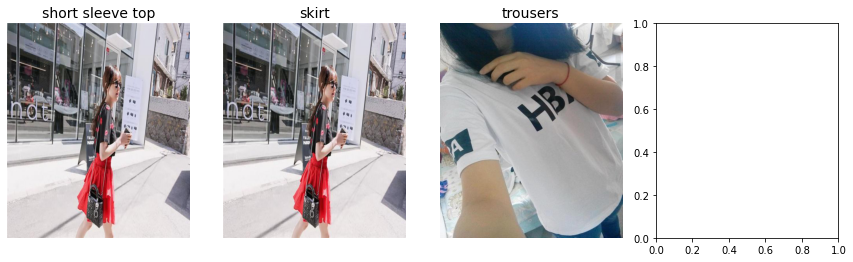

In [6]:
def _samples_per_category(df: pd.DataFrame,
                          column: str,
                          n_samples: int = 7) -> pd.DataFrame:
    return df.groupby(column)\
             .apply(lambda x: x.sample(n_samples))\
             .reset_index(level=0, drop=True)\
             .reset_index()
    

column = 'category_name'
display_instances(_samples_per_category(df, column, n_samples=1),
                  title_column=column,
                  n_cols=4)

<AxesSubplot:>

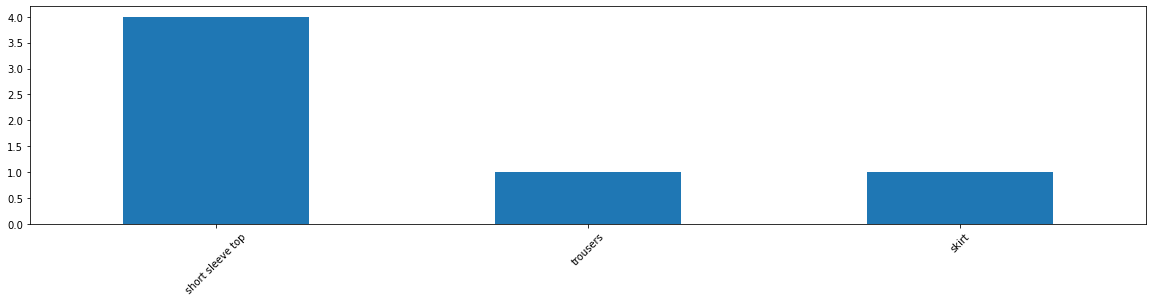

In [7]:
df[column].value_counts().plot.bar(figsize=(20, 4), rot=45)

We see some categories are highly close to one another (e.g. sling dress and short sleeve dress).

### Display images by source information

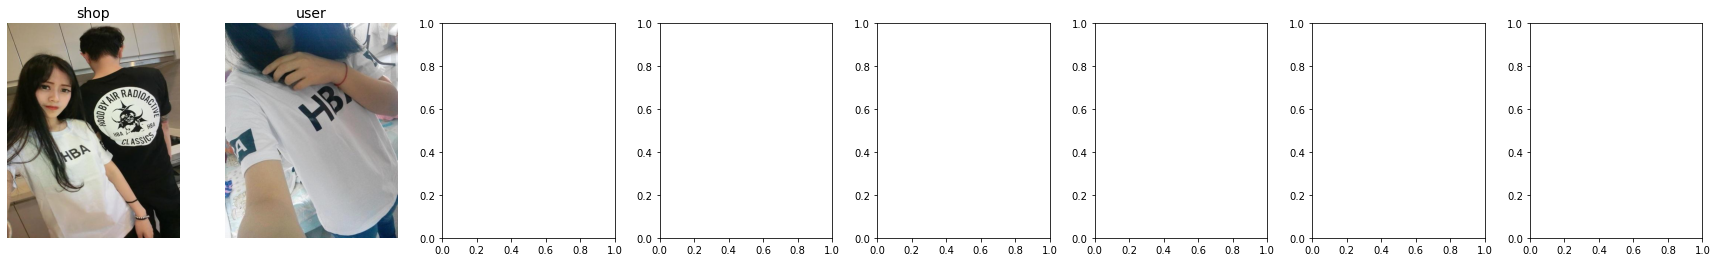

In [8]:
column = 'source'
display_instances(_samples_per_category(df, column, n_samples=1),
                  title_column=column,
                  n_cols=8)

<AxesSubplot:>

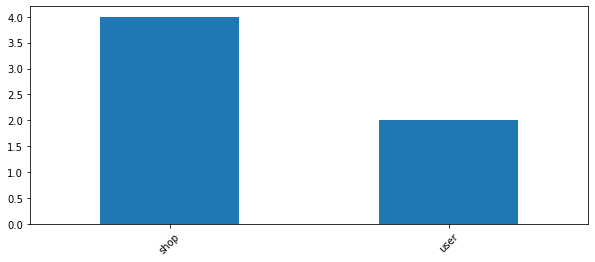

In [9]:
df[column].value_counts().plot.bar(figsize=(10, 4), rot=45)

We see the `shop` images have much higher quality than `user` images. We see that there are ~3 times more shop images than user images.

### Display image by viewpoint information

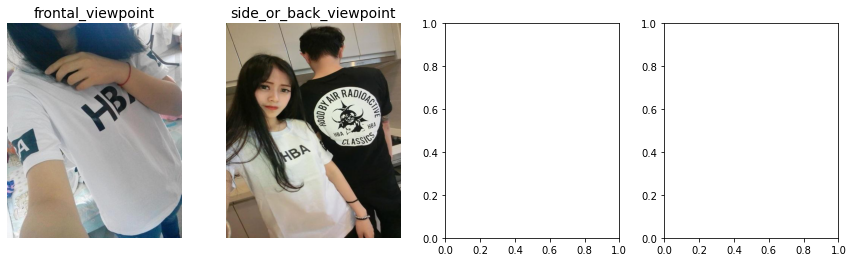

In [10]:
column = 'viewpoint_categorical'
display_instances(_samples_per_category(df, column, n_samples=1),
                  title_column=column,
                  n_cols=4)

<AxesSubplot:>

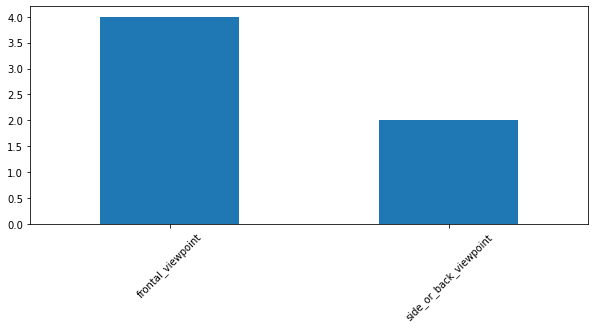

In [11]:
df[column].value_counts().plot.bar(figsize=(10, 4), rot=45)

We see that the viewpoint information can be ambiguous as side viewpoint (which most of the time are mostly frontal vies) and back viewpoint are tagged in the same category. Moreover, we observe that most of the images fall in frontal category.

### Display image by scale information

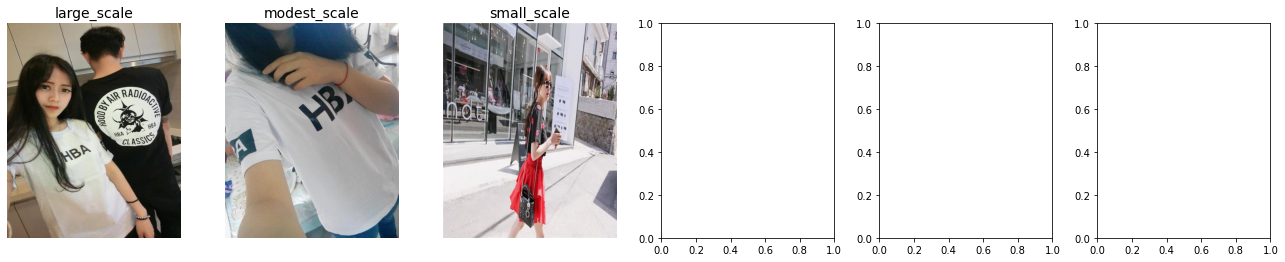

In [12]:
column = 'scale_categorical'
display_instances(_samples_per_category(df, column, n_samples=1),
                  title_column=column,
                  n_cols=6)

<AxesSubplot:>

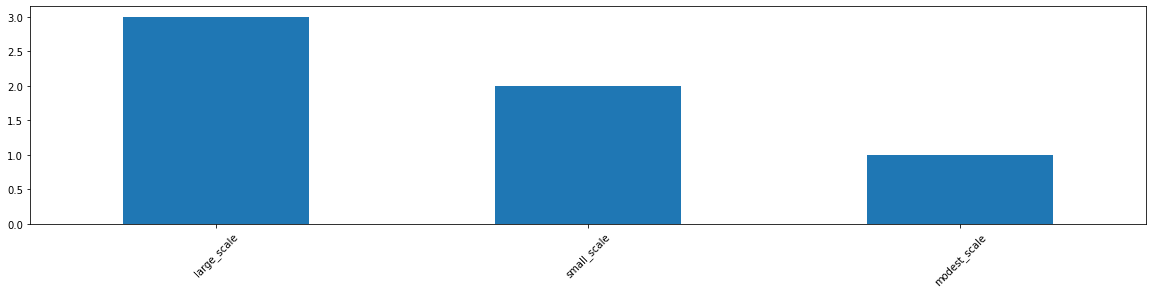

In [13]:
df[column].value_counts().plot.bar(figsize=(20, 4), rot=45)

Again, we see that scale is not very informative, as `small` and `modest` scale refer to very similar kind of images. However, they seem to properly tag those which are zoomed in pictures.

### Display image by zoom-in information

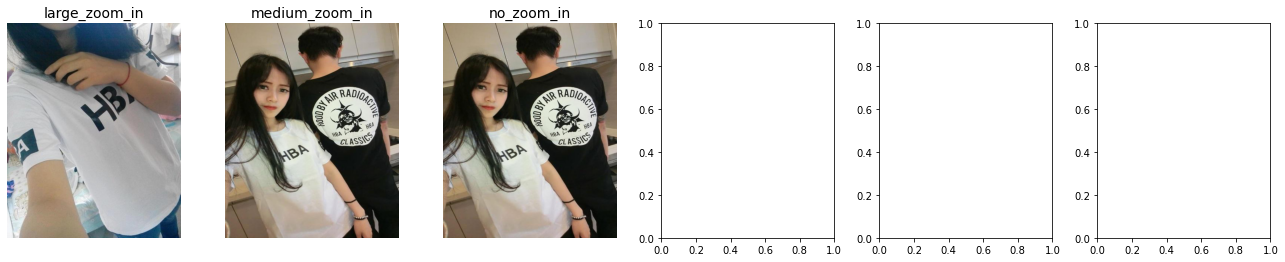

In [14]:
column = 'zoom_in_categorical'
display_instances(_samples_per_category(df, column, n_samples=1),
                  title_column=column,
                  n_cols=6)

<AxesSubplot:>

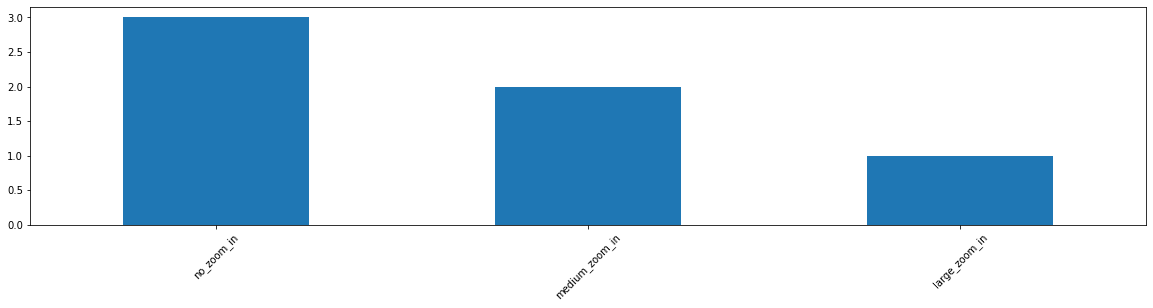

In [15]:
df[column].value_counts().plot.bar(figsize=(20, 4), rot=45)

We observe that this feature gives little information about the content, as we see that similar images appear in different categories such as `no_zoom_in` and `large_zoom_in`.

### Display image by occlusion information

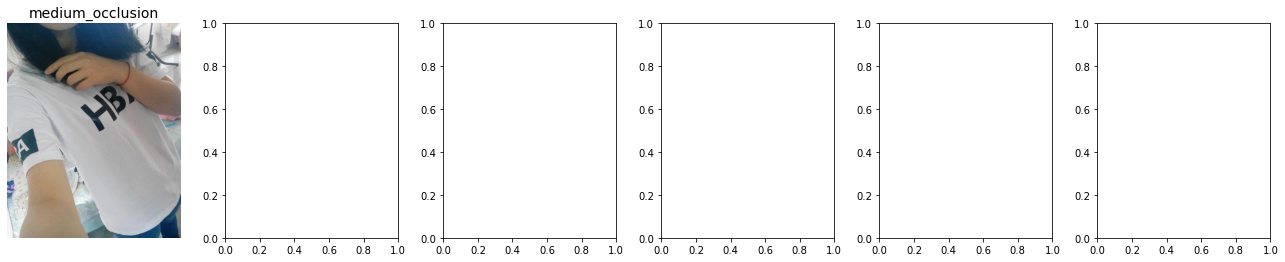

In [16]:
column = 'occlusion_categorical'
display_instances(_samples_per_category(df, column, n_samples=1),
                  title_column=column,
                  n_cols=6)

<AxesSubplot:>

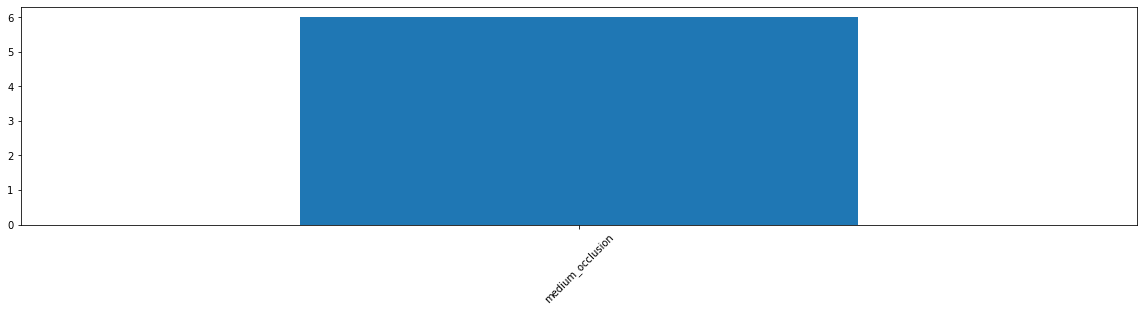

In [17]:
df[column].value_counts().plot.bar(figsize=(20, 4), rot=45)

Again, it is not clear what is the criteria used to tag image occlusion.

### Display image pairs

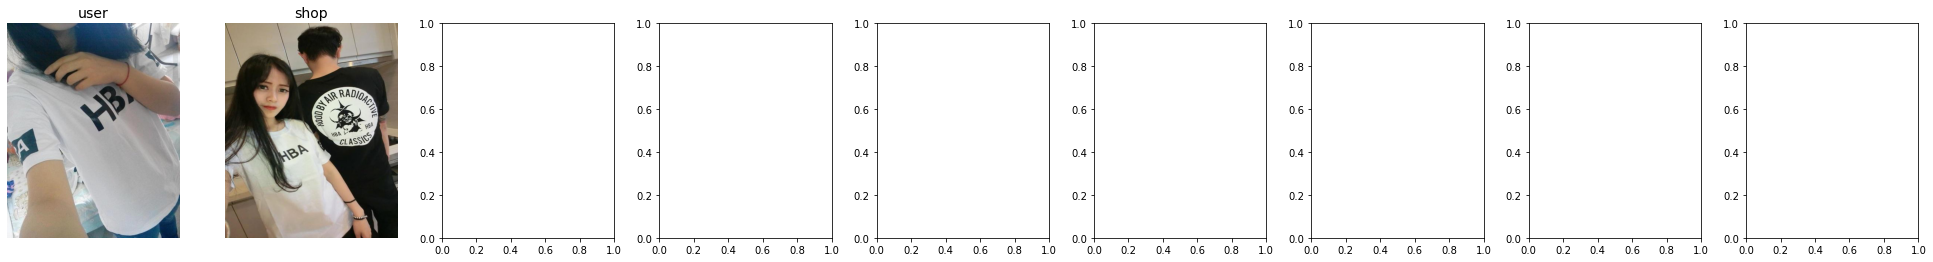

In [18]:
pair_ids = list(df.sample(1)['pair_id'].values)
sample_pairs_df = df[df['pair_id'].isin(pair_ids)].drop_duplicates(['image_path'])
display_instances(sample_pairs_df, title_column='source', n_cols=9)

Shop and user image does not need to be from the same size or color. That can be read in the `style` field (see [documentation](https://github.com/switchablenorms/DeepFashion2)).

## Clothing elements per image: stats

In [19]:
clothes_per_image = df.groupby('image_path')['category_id'].count()
mean, std = clothes_per_image.mean(), clothes_per_image.std()
print(f'Clothes per image: {mean:.2f} +- {std:.2f}')

Clothes per image: 2.00 +- 0.00


## Mask generation

Compute mask image from examples.

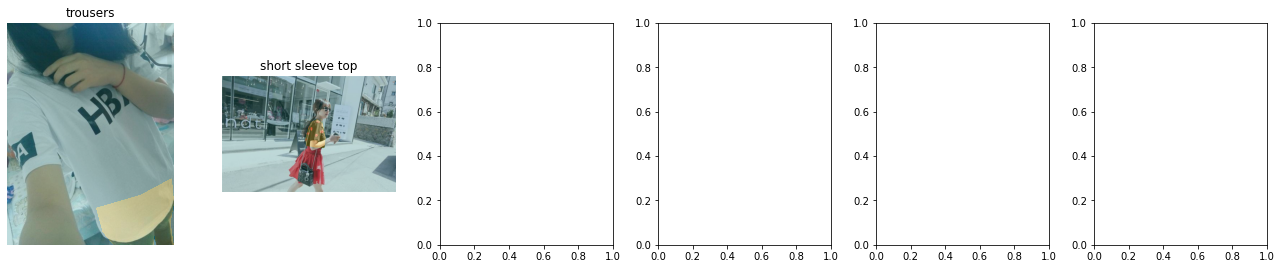

In [20]:
def _display_masks(image: np.ndarray, masks: List, ax=None):
    # Display image
    if ax is not None:
        axis = ax
    else:
        plt.figure(figsize=(8, 15))
        axis = plt
    axis.imshow(image)
    
    # Display all masks
    for mask in masks:
        axis.imshow(mask, alpha=0.25, vmin=-1.0, vmax=1.0)

        
def instance_to_mask(row: pd.Series) -> np.ndarray:
    image = skimage.io.imread(row['image_path'])
    image_height, image_width = image.shape[:2]
    return get_mask(image_height,
                    image_width,
                    polygons=row['segmentation'],
                    category_id=int(row['category_id']))


def display_instance_mask(row: pd.Series, ax) -> None:
    masks = [instance_to_mask(row)]
    image = skimage.io.imread(row['image_path'])
    _display_masks(image, masks, ax=ax)
    ax.set_title(row["category_name"])
    ax.axis('off')
    
samples = df.sample(2)
display_instances(samples, display_fn=display_instance_mask, n_cols=6)

We see that, in many cases, polygons defining the clothing area are quite sharp and do not properly wrap the clothes margin.

Let's now visualize examples of images with all masks in it.

id
28    short sleeve top
28               skirt
Name: category_name, dtype: object

id
1            trousers
1    short sleeve top
Name: category_name, dtype: object



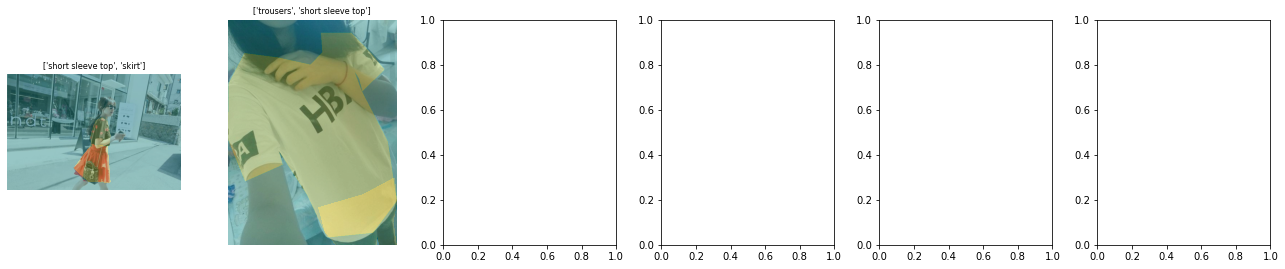

In [21]:
def display_all_instance_masks(row: pd.Series, ax) -> None:
    items = df[df.index == row.name]
    print(f'{items["category_name"]}\n')
    masks = items.apply(instance_to_mask, axis=1).values.tolist()
    image = skimage.io.imread(row['image_path'])
    _display_masks(image, masks, ax=ax)
    # Displau call categories
    categories = items["category_name"].values.tolist()
    ax.set_title(f'{categories}', fontsize=8)
    ax.axis('off')

samples = df.sample(2)
display_instances(samples, display_fn=display_all_instance_masks, n_cols=6)